# MD on primitive Be2W

In [1]:
from ase import Atom, Atoms
from ase.calculators.espresso import Espresso
from ase.constraints import FixAtoms
from ase.geometry import get_layers
from ase.io.cif import read_cif
from ase.io.espresso import read_espresso_out, write_espresso_in
from ase.io.vasp import read_vasp
from ase.visualize import view
from ase.visualize.plot import plot_atoms

from copy import deepcopy
from matplotlib import pyplot as plt
import math
import numpy as np
from datetime import datetime

from qe_utils import (velocity,
    import_vasp,
    output_to_atoms,
    relax,
    pin_bottom_layers,
    get_D_position,
    preview,
    md,
    sanitize)

In [2]:
# Numeric constants
# 1 picosecond = n Rydberg a.u.
PS_TO_AU = 1e-12 / (4.8378 * 1e-17)

# 1 femtosecond
FS_TO_AU = 1e-15 / (4.8378 * 1e-17)

DEUTERIUM_MASS_AMU = 2.014
DT = 0.2 * round(FS_TO_AU) # 0.2fs

## Add vacuum and a single `D` atom

Fix the crystal in place & add vacuum on either side. Then add an unconstrained `D` atom `INITIAL_DISTANCE_A` Angstroms away from the slab.

<Axes: >

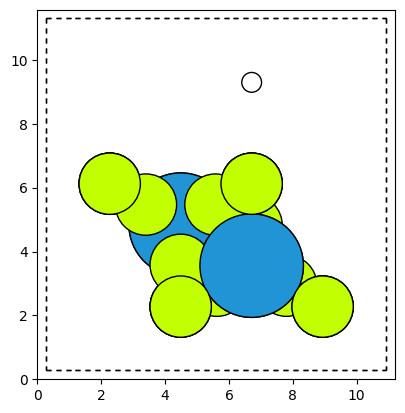

In [31]:
# Create our slab
slab = import_vasp('input/Be18W4.cube.vasp', truncate=False)
atoms = deepcopy(slab)
DEUTERIUM_XYZ = np.array([0.2, 5.0, 1.63156075]) #[0, 3.191, 2.566])
deuterium = Atom('H', mass=DEUTERIUM_MASS_AMU, position=DEUTERIUM_XYZ)
atoms.append(deuterium)
atoms.center(vacuum=2.)
plot_atoms(atoms)

<Axes: >

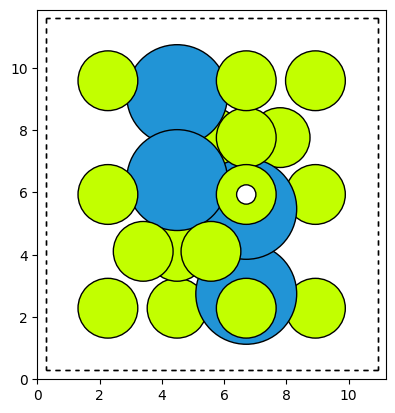

In [32]:
plot_atoms(atoms, rotation=('90x,0y,0z'))

## Run MD

In [33]:
output_filename = md(
    atoms,
    nsteps=20,
    dt=DT,
    initial_eV=1000,
    is_cluster=False,
    ncores=12,
    velocity_multiplier=2.1,
)
sanitize(output_filename)

Writing D initial velocity 2000eV (atomic velocities: ATOMIC_VELOCITIES
Be 0.0 0.0 0.0
Be 0.0 0.0 0.0
Be 0.0 0.0 0.0
Be 0.0 0.0 0.0
Be 0.0 0.0 0.0
Be 0.0 0.0 0.0
Be 0.0 0.0 0.0
Be 0.0 0.0 0.0
Be 0.0 0.0 0.0
Be 0.0 0.0 0.0
Be 0.0 0.0 0.0
Be 0.0 0.0 0.0
Be 0.0 0.0 0.0
Be 0.0 0.0 0.0
Be 0.0 0.0 0.0
Be 0.0 0.0 0.0
Be 0.0 0.0 0.0
Be 0.0 0.0 0.0
W 0.0 0.0 0.0
W 0.0 0.0 0.0
W 0.0 0.0 0.0
W 0.0 0.0 0.0
H -0.20010 -0.00000 -0.00000)
Running command: mpirun -np 12 q-e/bin/pw.x -inp md_data/md_Be18W4H_20steps_2000eV_incident0_polar0.in


KeyboardInterrupt: 

From here, run `ase gui <output_filename>` to view the animation